<a href="https://colab.research.google.com/github/AjeetsRana/Social-Media-App/blob/main/NutriScope101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Thu Aug 22 13:45:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
# Get helper functions file
if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/Ajeet-Rana/NutriScope101/main/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2024-08-22 13:46:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-08-22 13:46:09 (88.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# All datasets in TFDS
data_list = tfds.list_builders()

# Check if 'Food 101' Dataset is present in datasets_list or not
required_data = "food101"
if(required_data in data_list):
  print("Food 101 is Present in Tensorflow Dataset")
else:
  print("Food 101 is NOT present in Tensorflow Dataset")

Food 101 is Present in Tensorflow Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load in the data into Training and test seperately
(train_data , test_data),data_set_info = tfds.load(name = "food101", # Required Dataset
                                                   data_dir='/drive/MyDrive/tfds_data',
                                                    split = ["train","validation"], # Spiliting the data into train and validate
                                                    shuffle_files=True, # Shuffling files for randomness
                                                    as_supervised=True, # download data in tuple format (sample , label) , eg. (pizza_img , "pizza")
                                                    with_info=True, # include dataset metadata
                                                    )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
len(train_data) , len(test_data)

(75750, 25250)

In [ ]:
# Exploring the Food101 data from Tensorflow Dataset

# Features of Food101
data_set_info.features

# Let's understand Label
food_class_names = data_set_info.features["label"].names
food_class_names[:5]

# let's explore a sample off training data

training_sample = train_data.take(1)
training_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for train_img , label in training_sample:
  print(f"""
  Image shape : {train_img.shape}
  Image dtype : {train_img.dtype}
  Sample label integer indices corresponding to the food classes : {label}
  Class name : {food_class_names[label.numpy()]}
        """)


  Image shape : (512, 384, 3)
  Image dtype : <dtype: 'uint8'>
  Sample label integer indices corresponding to the food classes : 74
  Class name : peking_duck
        


In [ ]:
# Let's explore image
train_img

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[152, 129,  77],
        [160, 137,  85],
        [160, 137,  85],
        ...,
        [ 26,  21,  18],
        [ 24,  19,  16],
        [ 21,  16,  13]],

       [[156, 133,  81],
        [158, 135,  83],
        [155, 132,  80],
        ...,
        [ 25,  20,  17],
        [ 23,  18,  15],
        [ 22,  17,  14]],

       [[164, 141,  87],
        [159, 136,  82],
        [147, 124,  70],
        ...,
        [ 23,  18,  15],
        [ 21,  17,  14],
        [ 20,  16,  13]],

       ...,

       [[  1,  49, 121],
        [  0,  47, 119],
        [  0,  48, 120],
        ...,
        [ 26,  14,  16],
        [ 26,  14,  16],
        [ 32,  20,  22]],

       [[  1,  49, 121],
        [  0,  47, 119],
        [  0,  48, 120],
        ...,
        [ 24,  14,  15],
        [ 30,  18,  18],
        [ 30,  18,  18]],

       [[  2,  50, 122],
        [  0,  48, 120],
        [  0,  48, 120],
        ...,
        [ 22,  12,  1

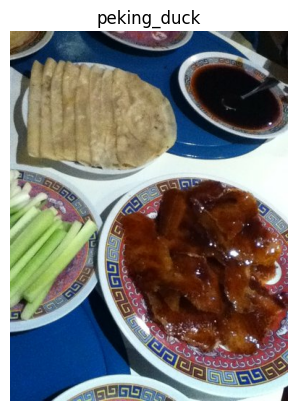

In [ ]:
# Plot a image tensor
plt.imshow(train_img)
plt.title(food_class_names[label.numpy()])
plt.axis(False);

#Preprocessing

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image , label , img_shape=224):
  """
  Converts image datatype from 'unit8' to float32 and resize the image shape to (224,224,3)
  """
  image = tf.expand_dims(image, axis=-1) if image.ndim == 2 else image
  image = tf.image.resize(image , [img_shape , img_shape])
  return tf.cast(image,tf.float32) , label # return modified dtype tuple

In [ ]:
# Evaluating a sample image
preprocessed_img = preprocess_img(train_img ,label)[0]
print(f"Unprocessed : \n{train_img[:2]}...\nShape : {train_img.shape} , \nData_Type : {train_img.dtype}\n")
print(f"Processed : \n{preprocessed_img[:2]}.. \nShape : {preprocessed_img.shape}, \nData_type : {preprocessed_img.dtype}, \n")

Unprocessed : 
[[[152 129  77]
  [160 137  85]
  [160 137  85]
  ...
  [ 26  21  18]
  [ 24  19  16]
  [ 21  16  13]]

 [[156 133  81]
  [158 135  83]
  [155 132  80]
  ...
  [ 25  20  17]
  [ 23  18  15]
  [ 22  17  14]]]...
Shape : (512, 384, 3) , 
Data_Type : <dtype: 'uint8'>

Processed : 
[[[156.05103  133.05103   81.05102 ]
  [156.13776  133.13776   81.13776 ]
  [146.31122  123.311226  71.311226]
  ...
  [ 22.454105  17.454105  13.668401]
  [ 25.306135  20.306135  17.306135]
  [ 22.25511   17.25511   14.25511 ]]

 [[159.82652  136.82652   82.82653 ]
  [149.79591  126.79591   72.79591 ]
  [132.69388  109.69388   57.26531 ]
  ...
  [ 24.183672  19.183672  15.397966]
  [ 22.21425   17.21425   14.214251]
  [ 18.83164   14.83164   11.83164 ]]].. 
Shape : (224, 224, 3), 
Data_type : <dtype: 'float32'>, 



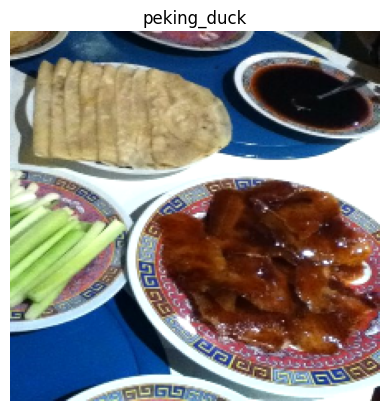

In [ ]:
# Let's visualize the Preprocessed image
plt.imshow(preprocessed_img/225.)
plt.title(food_class_names[label])
plt.axis(False);

In [ ]:
# Map preprocessing funtion to training data (and paralellize)
train_data = train_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE)

# Shuffle traindata and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)


# Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)

# Turn test data into batches (no shuffling)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data , test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
from helper_functions import create_tensorboard_callback

checkpoint_path = "model_checkpoints.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16")

In [ ]:
mixed_precision.global_policy()

<DTypePolicy "mixed_float16">

In [ ]:
# Building the model

from tensorflow.keras import layers

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = True;

# Creating the Input layer
inputs = tf.keras.layers.Input(shape = input_shape , name = "Input_Layer" ,dtype=tf.float32)

x = base_model(inputs , training=True)
x = layers.GlobalAveragePooling2D(name = "Global_pooling_layer")(x)
x = layers.Dense(len(food_class_names))(x)

outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_pooling_layer                 │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 4,136,929 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

Input_Layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 True float32 <DTypePolicy "mixed_float16">
Global_pooling_layer True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [ ]:
len(train_data)


2368

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data)-26,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20240822-141001
Epoch 1/3
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 323s 105ms/step - accuracy: 0.4748 - loss: 2.1615 - val_accuracy: 0.6970 - val_loss: 1.1479
Epoch 2/3
  26/2342 ━━━━━━━━━━━━━━━━━━━━ 1:19:41 2s/step - accuracy: 0.6220 - loss: 1.3867

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2342/2342 ━━━━━━━━━━━━━━━━━━━━ 60s 26ms/step - accuracy: 0.6437 - loss: 1.2781 - val_accuracy: 0.6965 - val_loss: 1.1126
Epoch 3/3
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 242s 102ms/step - accuracy: 0.7056 - loss: 1.1044 - val_accuracy: 0.7439 - val_loss: 0.9345


In [ ]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7553 - loss: 0.9213


[0.9222984313964844, 0.7515247464179993]

In [ ]:
len(train_data)

2368

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=6,
                                                     steps_per_epoch=len(train_data)-26,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_101_food_classes_feature_extract.epoch[-1],
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20240822-142248
Epoch 3/6
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 245s 103ms/step - accuracy: 0.7619 - loss: 0.8653 - val_accuracy: 0.7444 - val_loss: 0.9973
Epoch 4/6
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7444 - loss: 0.9225 - val_accuracy: 0.7466 - val_loss: 0.9730
Epoch 5/6
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 236s 100ms/step - accuracy: 0.7995 - loss: 0.7128 - val_accuracy: 0.7585 - val_loss: 0.9088
Epoch 6/6
2342/2342 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7953 - loss: 0.7281 - val_accuracy: 0.7418 - val_loss: 1.0071


In [ ]:
model.evaluate(test_data)

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [ ]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data)-26,
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

In [ ]:
model.evaluate(test_data)

In [ ]:
model.save("NutriScope_101food_model.h5")

In [ ]:
pred_probs = model.predict(test_data,verbose = 1)

In [ ]:
len(pred_probs)

In [ ]:
len(pred_probs[0])

In [ ]:
pred_probs[0].argmax()

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
len(pred_classes)